# Initial setup

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import pandas as pd
import pickle
import gdown

In [ ]:
# Get data
data_train_id = "1oG5FtbXgUgnYkQI-Om-MBq_n1s2dYUAt"
data_test_id = "1dViHrJP7Lm6nr_RhEaDB9A7IlOwy439s"
target_train_id = "1km9rjrYGDyQlLE_20Q4kLjJXWoXLgEA9"
target_test_id = "1N-xiJWDqQJq2UMaafuBwGg6ghRLvrpEM"

data_train_norm_id = "1sstp-w4HBoFiegK90uHiMwuOygNOKaEU"
data_test_norm_id = "1CyN22bU0iyYbgMwUVYNSJPc_GwqMCL1P"



gdown.download(id=data_train_id, output="data_train.npy", quiet=True)
gdown.download(id=data_test_id, output="data_test.npy", quiet=True)
gdown.download(id=target_train_id, output="target_train.npy", quiet=True)
gdown.download(id=target_test_id, output="target_test.npy", quiet=True)
gdown.download(id=data_train_norm_id, output="data_train_norm.npy", quiet=True)
gdown.download(id=data_test_norm_id, output="data_test_norm.npy", quiet=True)

In [3]:
data_train = np.load("data_train.npy", allow_pickle=True)
data_test = np.load("data_test.npy")
target_train = np.load("target_train.npy")
target_test = np.load("target_test.npy")
data_train_norm = np.load("data_train_norm.npy")
data_test_norm = np.load("data_test_norm.npy")

data_train, target_train, data_train_norm = shuffle(data_train, target_train, data_train_norm, random_state=42)
data_test, target_test, data_test_norm = shuffle(data_test, target_test, data_test_norm, random_state=42)

data_train = data_train.reshape(data_train.shape[0], 125, 9, data_train.shape[2])
data_test = data_test.reshape(data_test.shape[0], 125, 9, data_test.shape[2])

data_train_norm = data_train_norm.reshape(data_train_norm.shape[0], 125, 9, data_train_norm.shape[2])
data_test_norm = data_test_norm.reshape(data_test_norm.shape[0], 125, 9, data_test_norm.shape[2])

NUM_CLASSES = 19

# Metrics

In [ ]:
# Load data. After using Training.ipynb, .keras and .pkl files will be generated.
# We can use these to find metrics using the code below.

models = {}
modes = ['no_transfer', 'naive_transfer', 'weighted_transfer']
model_names = ['lstm', 'encoder', 'resnet']

for mode in modes:
  models[mode] = {}
  for model_name in model_names:
    models[mode][model_name] = {}
    model = load_model(f'{mode}_model_{model_name}.keras', safe_mode=False)
    models[mode][model_name]['model'] = model
    with open(f'{mode}_history_{model_name}.pkl', 'rb') as file:
      models[mode][model_name]['history'] = pickle.load(file)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, accuracy_score

for mode in modes:
  for model_name in model_names:
    model = models[mode][model_name]['model']
    history = models[mode][model_name]['history']

    y_prob = model.predict(data_test_norm[:, :, :, 0])
    y_pred = np.argmax(y_prob, axis=1)
    y_true = target_test

    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)

    # report = classification_report(y_true, y_pred, digits=4, output_dict=True)
    # df_report = pd.DataFrame(report).T
    print(f"********** Report for {mode} {model_name} **********")
    # print(df_report)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Weighted F1 Score: {f1:.4f}")
    print(f"Weighted Precision: {precision:.4f}")
    print(f"Weighted Recall: {recall:.4f}")
    print("\n\n")

# Graph training vs validation accuracy for encoder model

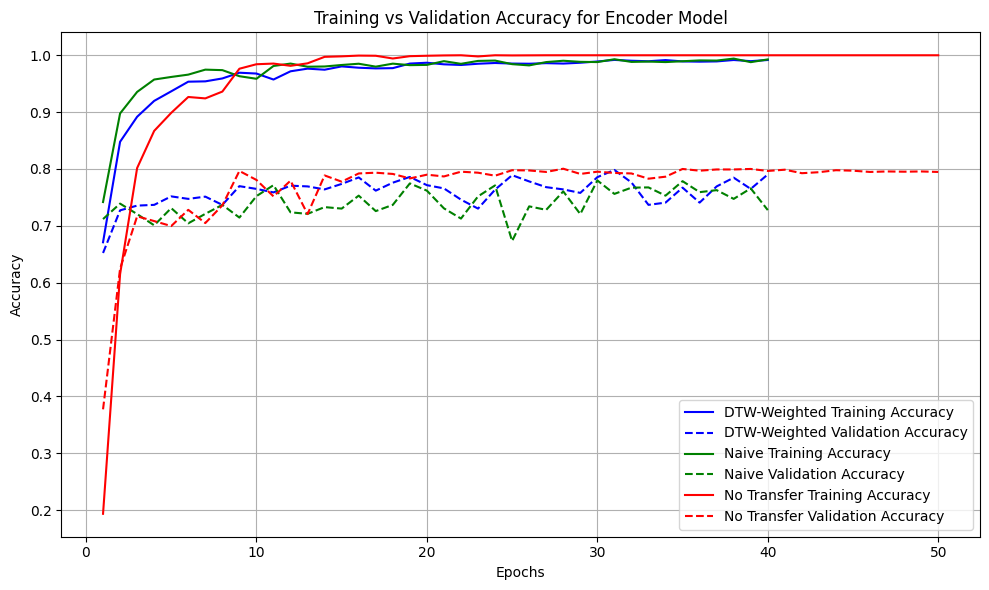

In [ ]:
import matplotlib.pyplot as plt

weighted_train_accuracies = models['weighted_transfer']['encoder']['history'].history['accuracy']
weighted_val_accuracies = models['weighted_transfer']['encoder']['history'].history['val_accuracy']
naive_train_accuracies = models['naive_transfer']['encoder']['history'].history['accuracy']
naive_val_accuracies = models['naive_transfer']['encoder']['history'].history['val_accuracy']
no_transfer_train_accuracies = models['no_transfer']['encoder']['history'].history['accuracy']
no_transfer_val_accuracies = models['no_transfer']['encoder']['history'].history['val_accuracy']

epochs = range(1, len(train_accuracies) + 1)
epochs_no_transfer = range(1, len(no_transfer_train_accuracies) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, weighted_train_accuracies, 'b-', label='DTW-Weighted Training Accuracy')
plt.plot(epochs, weighted_val_accuracies, 'b--', label='DTW-Weighted Validation Accuracy')
plt.plot(epochs, naive_train_accuracies, 'g-', label='Naive Training Accuracy')
plt.plot(epochs, naive_val_accuracies, 'g--', label='Naive Validation Accuracy')
plt.plot(epochs_no_transfer, no_transfer_train_accuracies, 'r-', label='No Transfer Training Accuracy')
plt.plot(epochs_no_transfer, no_transfer_val_accuracies, 'r--', label='No Transfer Validation Accuracy')
plt.title('Training vs Validation Accuracy for Encoder Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()